Необхідно виконати:

1. Прочитайте csv файл (використовуйте функцію read_csv)
2. Виведіть перші п'ять рядків (використовується функція head)

In [50]:
import pandas as pd

df = pd.read_csv("bestsellers with categories.csv")
first_5_rows = df.head()
first_5_rows

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


3. Виведіть розміри датасету (використовуйте атрибут shape)

In [51]:
df.shape

(550, 7)

<div class="alert alert-block alert-info">Про скільки книг зберігає дані датасет?

**Відповідь: 351**</div>

In [52]:
unique_books = df["Name"].nunique()
print("Про скільки книг зберігає дані датасет? Відповідь:", unique_books)

Про скільки книг зберігає дані датасет? Відповідь: 351


***
## Первинне дослідження даних
***

In [53]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [54]:
missing_values = df.isna().sum()
missing_values

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

<div class="alert alert-block alert-info">Чи є в якихось змінних пропуски? 

**Відповідь: ні**</div>

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [34]:
unique_genre = df["genre"].unique()
print("Унікальні жанри:", unique_genre)

Унікальні жанри: ['Non Fiction' 'Fiction']


<div class="alert alert-block alert-info">Які є унікальні жанри? 

**Відповідь: 'Non Fiction', 'Fiction'**</div>

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<function matplotlib.pyplot.show(close=None, block=None)>

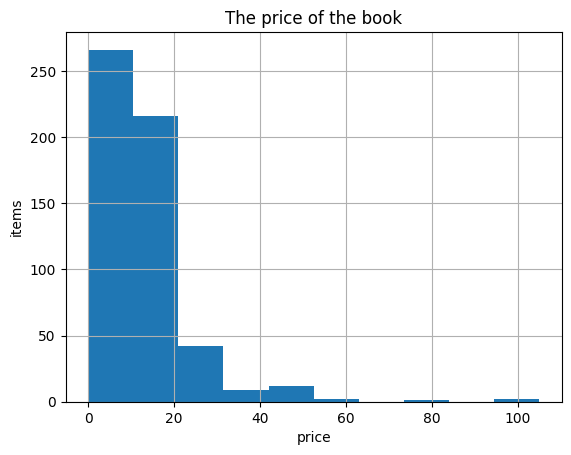

In [35]:
import matplotlib.pyplot as plt

plt.hist(df["price"])
plt.title("The price of the book")
plt.grid(True)
plt.xlabel("price")
plt.ylabel("items")
plt.show

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [36]:
max_price = df["price"].max()
min_price = df["price"].min()
av_price = df["price"].mean()
median_price = df["price"].median()

max_price, min_price, av_price, median_price


(105, 0, 13.1, 11.0)

<div class="alert alert-block alert-info"> Максимальна ціна?    

 **Відповідь: 105**  
 
Мінімальна ціна?    
 **Відповідь: 0** 

Середня ціна?   
 **Відповідь: 13.1** 

Медіанна ціна?  
 **Відповідь: 11.0**
</div>


***
## Пошук та сортування даних
***

In [37]:
max_rating = df["user_rating"].max()
max_rating

4.9

<div class="alert alert-block alert-info"> Відповідь: Який рейтинг у датасеті найвищий?   

 **Відповідь: 4.9**  
</div>

In [38]:
max_rating_books = df[df["user_rating"]==max_rating]["name"].nunique()
number_of_max_rating_books = max_rating_books
number_of_max_rating_books

28

<div class="alert alert-block alert-info"> Скільки книг мають такий рейтинг?   

 **Відповідь: 28**  
</div>

In [39]:
book_with_max_reviews = df[df["reviews"]==df["reviews"].max()]["name"]
book_with_max_reviews

534    Where the Crawdads Sing
Name: name, dtype: object

<div class="alert alert-block alert-info"> Яка книга має найбільше відгуків?   

 **Відповідь: Where the Crawdads Sing**  
</div>

In [40]:
top_50_2015 = df[df["year"] == 2015]
most_expensive_book_2015 = top_50_2015[
    top_50_2015["price"] == top_50_2015["price"].max()
]["name"]
most_expensive_book_2015

277    Publication Manual of the American Psychologic...
Name: name, dtype: object

<div class="alert alert-block alert-info"> З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

 **Відповідь:  Publication Manual of the American Psychologic...**  
</div>

In [41]:
top_2010_fiction = df[(df["year"]==2010) & (df["genre"] == "Fiction")]
len(top_2010_fiction)

20

<div class="alert alert-block alert-info"> Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

 **Відповідь:  20**  
</div>

In [42]:
books_with_high_rating_isin = df[
    (df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))
]

books_with_high_rating = df[
    (df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))
]

print(len(books_with_high_rating_isin), len(books_with_high_rating))

1 1


<div class="alert alert-block alert-info"> Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

 **Відповідь:  1**  
</div>

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [43]:
books_2015_under_8 = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(
    by="price", ascending=True
)
last_book_name = books_2015_under_8.iloc[-1]["name"]
last_book_name

'Old School (Diary of a Wimpy Kid #10)'

<div class="alert alert-block alert-info"> Яка книга остання у відсортованому списку?

 **Відповідь:  'Old School (Diary of a Wimpy Kid #10)'**  
</div>

***
## Агрегування даних та з'єднання таблиць
***

In [44]:
price_stats_by_genre = df.groupby("genre")["price"].agg(
    min_price="min", max_price="max"
)
price_stats_by_genre

,min_price,max_price
genre,,
Fiction,0,82
Non Fiction,0,105


<div class="alert alert-block alert-info"> Максимальна ціна для жанру Fiction:    

 **Відповідь: 82**  
 
Мінімальна ціна для жанру Fiction?    
 **Відповідь: 0** 

Максимальна ціна для жанру Non Fiction?   
 **Відповідь: 105** 

Мінімальна ціна для жанру Non Fiction?  
 **Відповідь: 0**
</div>


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [45]:
books_by_author = (
    df.groupby("author")["name"].agg(book_count="count").sort_values(by="book_count")
)
print(books_by_author)
books_by_author.shape

                                    book_count
author                                        
Jill Twiss                                   1
Patrick Thorpe                               1
Ian K. Smith M.D.                            1
Howard Stern                                 1
Hopscotch Girls                              1
...                                        ...
American Psychological Association          10
Suzanne Collins                             11
Gary Chapman                                11
Rick Riordan                                11
Jeff Kinney                                 12

[248 rows x 1 columns]


(248, 1)

<div class="alert alert-block alert-info"> Якої розмірності вийшла таблиця?

 **Відповідь:  (248, 1)**  

 Який автор має найбільше книг?     
 **Відповідь:  Jeff Kinney** 

Скільки книг цього автора?      
 **Відповідь:  12**

</div>

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [46]:
av_rating_by_author = (
    df.groupby("author")["user_rating"]
    .agg(avg_rating="mean")
    .sort_values(by="avg_rating")
)

av_rating_by_author

,avg_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


<div class="alert alert-block alert-info"> У якого автора середній рейтинг мінімальний?

 **Відповідь:  Donna Tartt**  

 Який у цього автора середній рейтинг?     
 **Відповідь:  3.9** 
</div>

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [47]:
author_stats = pd.concat([books_by_author, av_rating_by_author], axis=1)
author_stats

,book_count,avg_rating
author,,
Jill Twiss,1,4.900000
Patrick Thorpe,1,4.900000
Ian K. Smith M.D.,1,4.100000
Howard Stern,1,4.300000
Hopscotch Girls,1,4.800000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [48]:
author_stats.sort_values(by=["book_count", "avg_rating"], ascending= [True, True])

,book_count,avg_rating
author,,
Muriel Barbery,1,4.000000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Chris Cleave,1,4.100000
Geneen Roth,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


<div class="alert alert-block alert-info"> Який автор перший у списку?

 **Відповідь:  Muriel Barbery**  
</div>

***
## Візуалізації
***

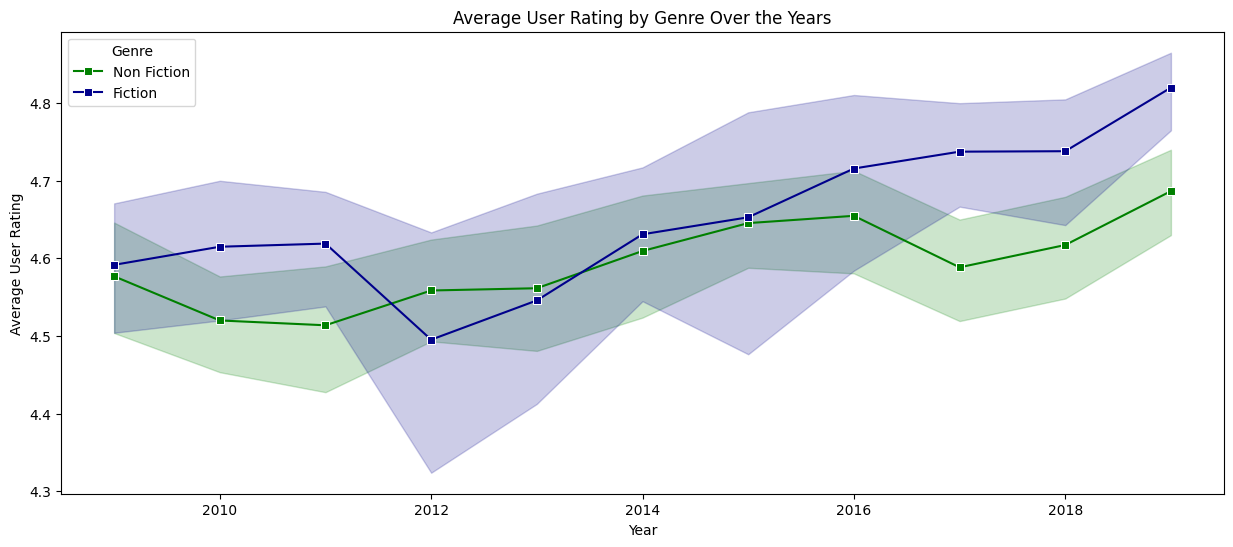

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
new_palette = ["green", "darkblue"]
sns.lineplot(
    data=df, x="year", y="user_rating", hue="genre", marker="s", palette=new_palette
)
plt.title("Average User Rating by Genre Over the Years")
plt.xlabel("Year")
plt.ylabel("Average User Rating")
plt.legend(title="Genre")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


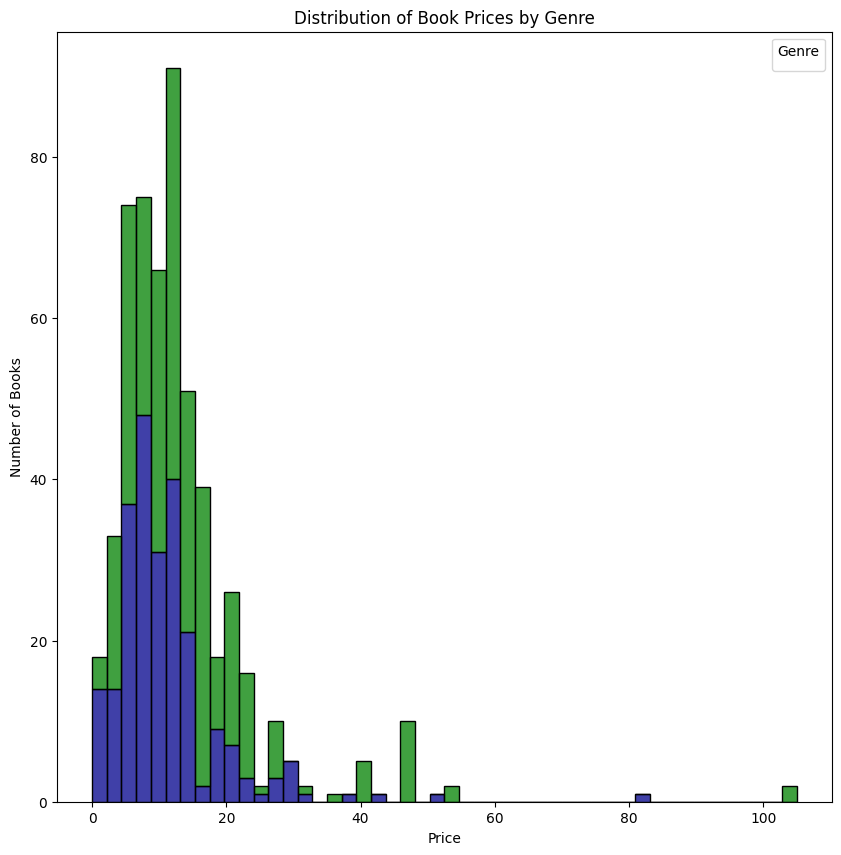

In [58]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="price", hue="genre", multiple="stack", palette=new_palette)
plt.title("Distribution of Book Prices by Genre")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.legend(title="Genre")
plt.show()

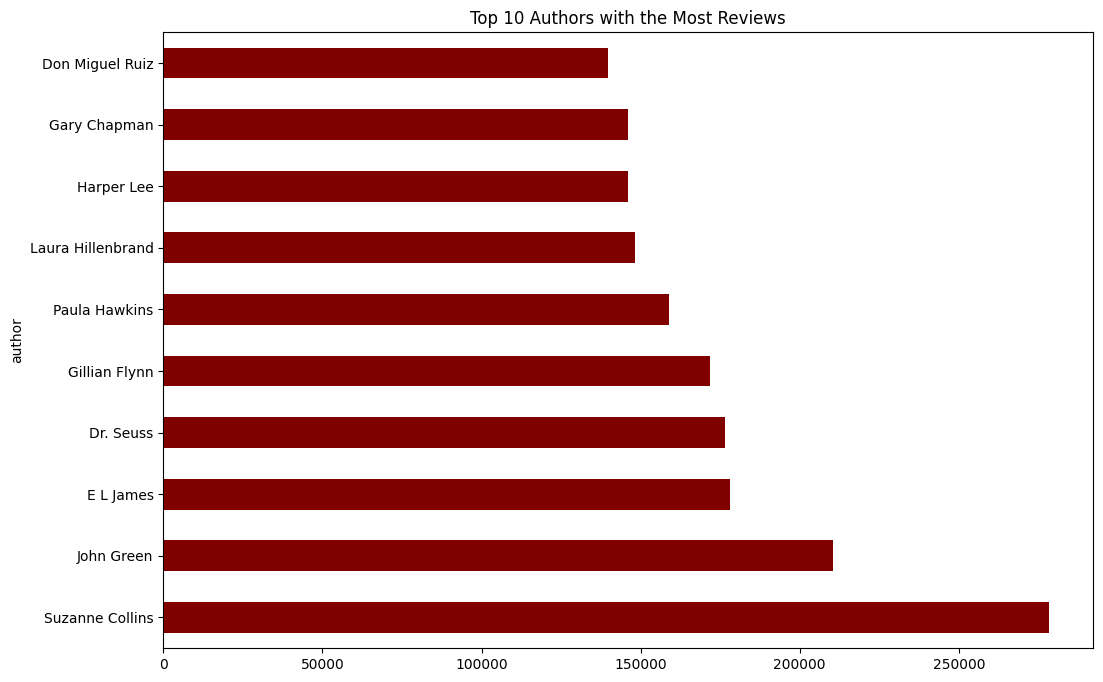

In [65]:
author_reviews = (
    df.groupby("author")["reviews"].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(12, 8))
author_reviews.plot(kind="barh", color="maroon")
plt.title("Top 10 Authors with the Most Reviews")
plt.show()